# 微积分
- 积分：integral calculus
- 微分：differential calculus
- 损失函数：loss function -> 越小模型越好
- 优化：optimization -> 用模型拟合观测数据的过程
- 泛化：generalization -> 数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型

## 导数和微分
$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$
如果$f'(a)$存在，则称$f$在点$a$处是可微（differentiable）的。 如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的

In [6]:
# u=f(x)=3x^2-4x
import numpy as np
from matplotlib_inline import backend_inline
import torch
import matplotlib.pyplot as plt

def f(x):
    return 3*x**2-4*x

# 令x=1且h->0，f'(x)值接近2
def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h
h=0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f,1,h):.5f}')
    h*=0.1


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


给定$y=f(x)$，其中$x$和$y$分别是函数$f$的自变量和因变量。以下表达式等价：
$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx}f(x) = Df(x) = D_x f(x),$$
其中$\frac{d}{dx}$和$D$是微分运算符，表示微分操作。
一些常见函数的导数如下：
- $DC=0$(C是常数)
- $Dx^n=nx^{n-1}$
- $De^x=e^x$
- $D\ln(x)=\frac{1}{x}$ 
一些法则：
1. **常数相乘法则**
$$\frac{d}{dx}\left[Cf(x)\right] = C\frac{d}{dx}f(x)$$
2. **加法法则**
$$\frac{d}{dx}\left[f(x) + g(x)\right] = \frac{d}{dx}f(x) + \frac{d}{dx}g(x)$$
3. **乘法法则**
$$\frac{d}{dx}\left[f(x)g(x)\right] = f(x)\frac{d}{dx}\left[g(x)\right] + g(x)\frac{d}{dx}\left[f(x)\right]$$
4. **除法法则**
$$\frac{d}{dx}\left[\frac{f(x)}{g(x)}\right] = \frac{g(x)\frac{d}{dx}\left[f(x)\right] - f(x)\frac{d}{dx}\left[g(x)\right]}{\left[g(x)\right]^2}$$

In [9]:
# 作图
def use_svg_display():
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

# 设置图表大小
def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表大小"""    
    use_svg_display
    plt.rcParams['figure.figsize'] = figsize

# 设置轴属性
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴属性"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend: axes.legend(legend)
    axes.grid()

# 绘制多条线条
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale='linear',yscale='linear',fmts=('-','m--','g-.','r:'),figsize=(3.5,2.5),axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes=axes if axes else plt.gca()
    # 如果X有一个轴，输出True 
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

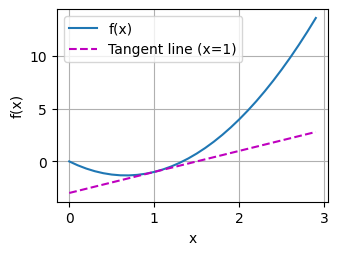

In [10]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 偏导数
偏导数的极限：
$$\frac{\partial y}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1, \dots, x_{i-1}, x_i + h, x_{i+1}, \dots, x_n) - f(x_1, \dots, x_i, \dots, x_n)}{h}.$$
为了计算$\frac{\partial y}{\partial x_i}$，可以将$x_1,\dots,x_{i-1},x_i,\dots,x_n$看作常数，并计算$y$关于$x_i$的导数。
$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$


## 梯度(gradiant)
函数$f$的输入是一个n维向量$\mathbf{x}=[\mathbf{x_1},\ldots,\mathbf{x_n}]^\top$，输出是一个标量$y=f(\mathbf{x})$。函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含n个偏导数的向量
$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[ \frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \dots, \frac{\partial f(\mathbf{x})}{\partial x_n} \right]^\top$$
其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时记作$\nabla f(\mathbf{x})$
规则：
- 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A}\mathbf{x} = \mathbf{A}^\top$
     $$A=\begin{bmatrix}a_{11}&\cdots&a_{1n}\\\vdots&\ddots&\vdots\\a_{m1}&\cdots&a_{mn}\\\end{bmatrix},X=\begin{bmatrix}x_1\\\vdots\\x_m\end{bmatrix}
      \Rightarrow AX=\begin{bmatrix}a_{11}x_1+\cdots+a_{1n}x_n\\\vdots\\\vdots\\\vdots\\a_{m1}x_1+\cdots+a_{mn}x_n\\\end{bmatrix}
      \Rightarrow \nabla_{\mathbf{x_1}} \mathbf{A}\mathbf{X} = \begin{bmatrix}a_{11}\\\vdots\\a_{m1}\\\end{bmatrix}=\alpha_1
      \Rightarrow \nabla_{\mathbf{X}} \mathbf{A}\mathbf{X} = \begin{bmatrix}\alpha_1^\top\\\alpha_2\top\\\vdots\\\alpha_n\top\\\end{bmatrix}=\mathbf{A}^\top$$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top\mathbf{A} = \mathbf{A}$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top\mathbf{A}\mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
- $\nabla_{\mathbf{x}} \|\mathbf{x}\|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top\mathbf{x} = 2\mathbf{x}$  
同样对于任何矩阵$\mathbf{X}$，都有$\nabla_{\mathbf{X}} \|\mathbf{X}\|_F^2 = 2\mathbf{X}$

## 链式法则
在深度学习中，多元函数通常是复合(composit)的 -> 使用链式法则求导
- 单变量函数，$y=f(u)$和$u=g(x)$都是可微的
  $$\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}$$
- 多变量函数，$y=f(u_1,u_2,...,u_n)$和$u_i=g_i(x_1,x_2,...,x_n)$都是可微的
  $$\frac{dy}{dx_i} = \frac{\partial y}{\partial u_1}\frac{\partial u_1}{\partial x_i}+\frac{\partial y}{\partial u_2}\frac{\partial u_2}{\partial x_i}+\cdots+\frac{\partial y}{\partial u_n}\frac{\partial u_n}{\partial x_i}$$

## 练习

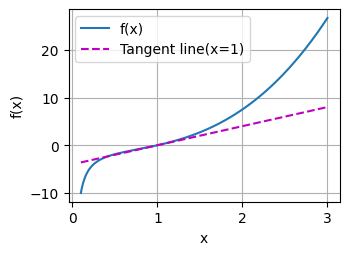

In [14]:
# 绘制函数y=f(x)=x^3-1/x和其在x=1处切线的图像
def f(x):
    return x**3-1/x

x=np.arange(0.1,3,0.00001)
plot(x,[f(x),4*x-4],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

### 函数$f(x)=\|x\|_2$的梯度


### 函数$u=f(x,y,z)$的链式法则，其中$x=x(a,b), y=y(a,b), z=z(a,b)$
$$\frac{\partial u}{\partial a}=\frac{\partial f}{\partial x}\frac{\partial x}{\partial a}+\frac{\partial f}{\partial y}\frac{\partial y}{\partial a}+\frac{\partial f}{\partial z}\frac{\partial z}{\partial a}$$